## Eigenvectors and Eigenvalues
### Use numpy only
#### Find eigenvalues and eigenvevtors of the following:

$$\begin{bmatrix} 1&0 \\ 0&2 \end{bmatrix}$$
$$\begin{bmatrix} 1&2 \\ 3&-4 \end{bmatrix}$$

In [11]:
import numpy as np

In [2]:
matrix = np.array([[1, 0], [0, 2]])
eigvals, eigvecs = np.linalg.eig(matrix)
print("Matrix 1")
print("Eig Values:\n", eigvals)
print("Eig Vectors:\n", eigvecs)
print()

Matrix 1
Eig Values:
 [1. 2.]
Eig Vectors:
 [[1. 0.]
 [0. 1.]]



In [3]:
matrix =np.array([[1, 2], [3, -4]])
eigvals, eigvecs = np.linalg.eig(matrix)
print("Matrix 1")
print("Eig Values:\n", eigvals)
print("Eig Vectors:\n", eigvecs)
print()

Matrix 1
Eig Values:
 [ 2. -5.]
Eig Vectors:
 [[ 0.89442719 -0.31622777]
 [ 0.4472136   0.9486833 ]]



## Diagonalization
- Use eigen decomposition of the second matrix from the above transformation matrices and apply it 10 times to a vector (-1,1).
- Make sure the same result will be obtained if we apply the original matrix 10 time. use <b>np.linalg.matrix_power()</b>

In [8]:
matrix1 = np.array([[1, 0], [0, 2]])
matrix2 = np.array([[1, 2], [3, -4]])

eigvals1, eigvecs1 = np.linalg.eig(matrix1)
eigvals2, eigvecs2 = np.linalg.eig(matrix2)


In [9]:
diagonal_matrix = np.diag(eigvals2)
inverse_eigvecs2 = np.linalg.inv(eigvecs2)
print("\nB Eig Values:\n", eigvals2)
print("B Eig Vectors:\n", eigvecs2)


B Eig Values:
 [ 2. -5.]
B Eig Vectors:
 [[ 0.89442719 -0.31622777]
 [ 0.4472136   0.9486833 ]]


In [10]:
print("B Diagonal Matrix\n", diagonal_matrix)


B Diagonal Matrix
 [[ 2.  0.]
 [ 0. -5.]]


In [11]:
vector = np.array([[-1], [1]])
diag_result = eigvecs2 @ np.linalg.matrix_power(diagonal_matrix, 10) @ inverse_eigvecs2 @ vector
print("Using Diagonalization:")
print(diag_result)

Using Diagonalization:
[[-4185853.]
 [12555511.]]


In [12]:
power_result = np.linalg.matrix_power(matrix2, 10) @ vector
print("Using power function:")
print(power_result)


Using power function:
[[-4185853]
 [12555511]]


# PCA Using Eigen Decomposition

### Create a matrix contains the following data

In [13]:
matrix = np.array([[1, 2, 3, 4],
       [5, 5, 6, 7],
       [1, 4, 2, 3],
       [5, 3, 2, 1],
       [8, 1, 2, 2]])

matrix

array([[1, 2, 3, 4],
       [5, 5, 6, 7],
       [1, 4, 2, 3],
       [5, 3, 2, 1],
       [8, 1, 2, 2]])

### Step 1: Standardize the dataset (Subtract mean and divide by standard deviation).

In [14]:
mean = np.mean(matrix, axis=0)
std_dev = np.std(matrix, axis=0)
print("mean : ",mean)
print("std  : ",std_dev)

mean :  [4.  3.  3.  3.4]
std  :  [2.68328157 1.41421356 1.54919334 2.05912603]


In [15]:
standardized_matrix = (matrix - mean) / std_dev
standardized_matrix

array([[-1.11803399, -0.70710678,  0.        ,  0.29138576],
       [ 0.372678  ,  1.41421356,  1.93649167,  1.74831455],
       [-1.11803399,  0.70710678, -0.64549722, -0.19425717],
       [ 0.372678  ,  0.        , -0.64549722, -1.16554303],
       [ 1.49071198, -1.41421356, -0.64549722, -0.6799001 ]])

### Step 2: Calculate the covariance matrix for the features in the dataset.
#### Use the formula (X.T@X) / n then confirm using np.cov()

In [22]:

matrix_centered = matrix - np.mean(matrix, axis=0)
n = matrix.shape[0]
cov_matrix_corrected = (matrix_centered.T @ matrix_centered) / (n - 1)
std_devs = np.std(matrix, axis=0, ddof=1)  
correlation_matrix_formula = cov_matrix_corrected / np.outer(std_devs, std_devs)
correlation_matrix_np = np.corrcoef(matrix.T)





In [17]:
print("Using the formula:")
print(correlation_matrix_formula)

Using the formula:
[[ 1.         -0.31622777  0.04811252 -0.18098843]
 [-0.31622777  1.          0.63900965  0.61812254]
 [ 0.04811252  0.63900965  1.          0.94044349]
 [-0.18098843  0.61812254  0.94044349  1.        ]]


In [18]:
print("\nUsing np.corrcoef():")
print(correlation_matrix_np)


Using np.corrcoef():
[[ 1.         -0.31622777  0.04811252 -0.18098843]
 [-0.31622777  1.          0.63900965  0.61812254]
 [ 0.04811252  0.63900965  1.          0.94044349]
 [-0.18098843  0.61812254  0.94044349  1.        ]]


### Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.
### Step 4: Sort eigenvalues and their corresponding eigenvectors.

In [23]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix_corrected)
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_values_sorted = eigen_values[sorted_indices]
eigen_vectors_sorted = eigen_vectors[:, sorted_indices]

In [26]:
print("Eigen Values:")
print(eigen_values_sorted)
print("\nEigen Vectors:")
print(eigen_vectors_sorted)

Eigen Values:
[10.6066305   7.90808697  1.19062586  0.09465667]


In [25]:
print("\nEigen Vectors:")
print(eigen_vectors_sorted)


Eigen Vectors:
[[ 0.69478464 -0.69892736 -0.11337302 -0.12618005]
 [-0.34820806 -0.17035429 -0.9082216  -0.15768352]
 [-0.32341225 -0.47997101  0.07300647  0.81222066]
 [-0.53984254 -0.50210337  0.39616934 -0.54727699]]


### Step 5: Pick k eigenvalues and form a matrix of eigenvectors.

#### Select the first 2 eigen vectors

In [29]:
# Step 5: 

eigen_vectors_selected = eigen_vectors_sorted[:, :2]
print("Selected Eigen Vectors:")
print(eigen_vectors_selected)

Selected Eigen Vectors:
[[ 0.69478464 -0.69892736]
 [-0.34820806 -0.17035429]
 [-0.32341225 -0.47997101]
 [-0.53984254 -0.50210337]]


### Step 6:Transform the original matrix.

In [31]:
### Step 6
X_transformed = matrix_centered @ eigen_vectors_selected
print("Transformed Data:")
print(X_transformed)

Transformed Data:
[[-2.06005139  1.96587434]
 [-2.91530135 -4.2871211 ]
 [-1.89321273  2.60724014]
 [ 2.31381898  0.98609174]
 [ 4.55474649 -1.27208513]]


## SVD
### Repeat using SVD and compare the results

In [33]:

U, S, V = np.linalg.svd(matrix_centered)

print("V (from SVD):")
print(V)




V (from SVD):
[[ 0.69478464 -0.34820806 -0.32341225 -0.53984254]
 [-0.69892736 -0.17035429 -0.47997101 -0.50210337]
 [-0.11337302 -0.9082216   0.07300647  0.39616934]
 [ 0.12618005  0.15768352 -0.81222066  0.54727699]]


In [34]:
print("\nSingular Values:")
print(S)



Singular Values:
[6.51356446 5.62426421 2.18231607 0.61532648]


In [35]:

print("\nU (from SVD):")
print(U)


U (from SVD):
[[-0.31627098  0.34953449  0.68094731 -0.33780033  0.4472136 ]
 [-0.44757388 -0.76225457 -0.13040603 -0.04049514  0.4472136 ]
 [-0.29065694  0.46357    -0.36638906  0.60529369  0.4472136 ]
 [ 0.35523084  0.17532813 -0.5210913  -0.60953667  0.4472136 ]
 [ 0.69927096 -0.22617805  0.33693908  0.38253845  0.4472136 ]]


In [36]:
V_selected = V[:2, :] 
matrix_transformed_svd = matrix_centered @ V_selected.T
print("Transformed Data using SVD:")
print(matrix_transformed_svd)

Transformed Data using SVD:
[[-2.06005139  1.96587434]
 [-2.91530135 -4.2871211 ]
 [-1.89321273  2.60724014]
 [ 2.31381898  0.98609174]
 [ 4.55474649 -1.27208513]]


## Apply the SVD on images
- We will use the SVD to extract the more important features from the image
- Let’s start by loading an image in python and convert it to a Numpy array. We will convert it to grayscale to have one dimension per pixel. The shape of the matrix corresponds to the dimension of the image filled with intensity values: 1 cell per pixel.

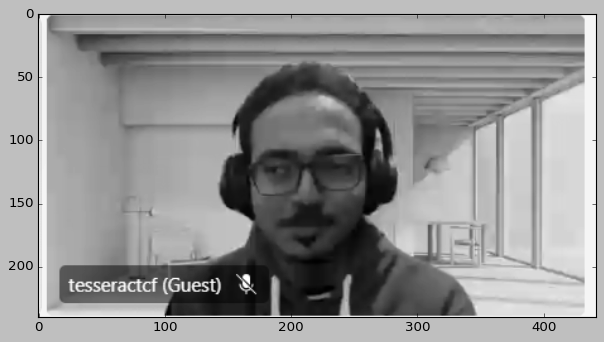

In [38]:
import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('classic')
img = Image.open('Screenshot 2024-12-26 123543.png')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

### Find SVD for the image data matrix (imgmat) and check the shape of the matrices (imgmat, U, D, and V.T)

In [41]:

print(f"Shape of the image matrix (imgmat): {imgmat.shape}")


Shape of the image matrix (imgmat): (240, 442)


In [43]:
U, D, Vt = np.linalg.svd(imgmat, full_matrices=False)


In [44]:
print(f"Shape of U: {U.shape}")


Shape of U: (240, 240)


In [45]:
print(f"Shape of D: {D.shape}")


Shape of D: (240,)


In [46]:
print(f"Shape of V.T: {Vt.shape}")

Shape of V.T: (240, 442)


### Remember:
#### D contains the singular values that need to be put into a diagonal matrix. 
#### Principal components can be obtained from U columns and V.T rows.

#### The singular vectors and singular values are ordered with the first ones corresponding to the more variance explained. For this reason, using just the first few singular vectors and singular values will provide the reconstruction of the principal elements of the image.

### Reconstruct the image from the first 2 principal components

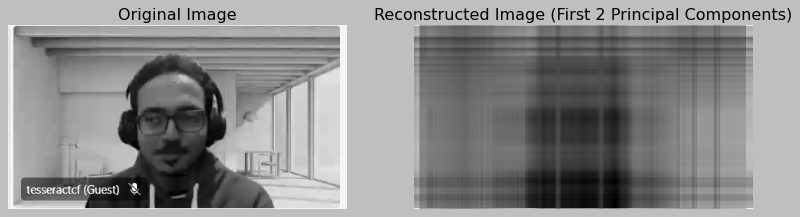

In [ ]:

U_reduced = U[:, :2]  
D_reduced = np.diag(D[:2])  
Vt_reduced = Vt[:2, :] 

img_reconstructed = U_reduced @ D_reduced @ Vt_reduced
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imgmat, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image (First 2 Principal Components)')
plt.axis('off')
plt.show()


### Reconstruct the image from the first 10 principal components

In [52]:
U_reduced = U[:, :10]  
D_reduced = np.diag(D[:10])  
Vt_reduced = Vt[:10, :]  
img_reconstructed = U_reduced @ D_reduced @ Vt_reduced

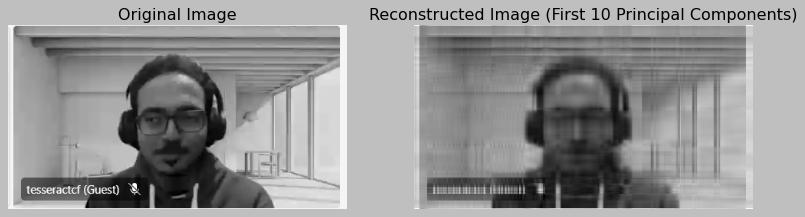

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imgmat, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image (First 10 Principal Components)')
plt.axis('off')

plt.show()


### Reconstruct the image from the first 50 principal components

In [55]:
U_reduced = U[:, :50]  
D_reduced = np.diag(D[:50])  
Vt_reduced = Vt[:50, :]  
img_reconstructed = U_reduced @ D_reduced @ Vt_reduced

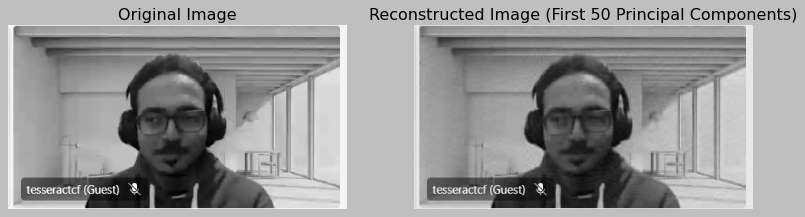

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imgmat, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image (First 50 Principal Components)')
plt.axis('off')

plt.show()

### Reconstruct the image from the first 100 principal components

In [58]:
U_reduced = U[:, :100]  
D_reduced = np.diag(D[:100])  
Vt_reduced = Vt[:100, :]  
img_reconstructed = U_reduced @ D_reduced @ Vt_reduced

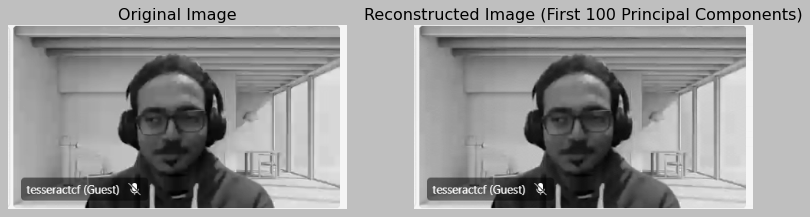

In [60]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imgmat, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image (First 100 Principal Components)')
plt.axis('off')

plt.show()

### Reconstruct the image from the first 200 principal components

In [63]:
U_reduced = U[:, :200]  
D_reduced = np.diag(D[:200])  
Vt_reduced = Vt[:200, :]  
img_reconstructed = U_reduced @ D_reduced @ Vt_reduced

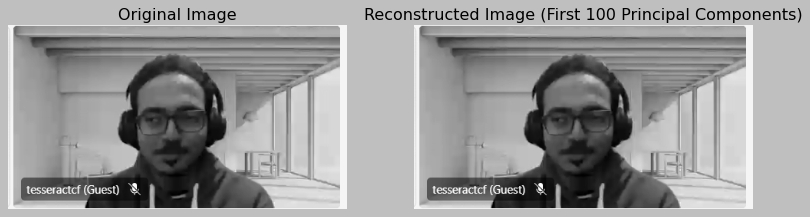

In [64]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imgmat, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image (First 100 Principal Components)')
plt.axis('off')

plt.show()

### What are the maximum number of components that you can use to reconstruct the image without loosing any information.
### Reconstruct the image using these components and compare the quality with the original image.
### Explain why did you choose this number.
### Can we use 500 principal components to reconstruct the image? Why?

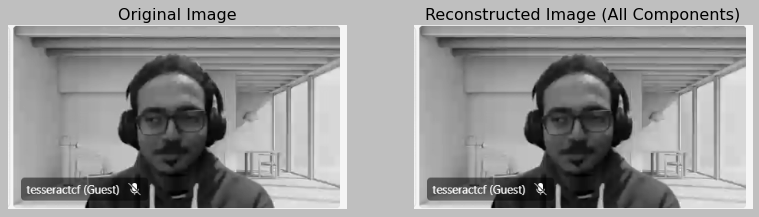

In [67]:
U, D, Vt = np.linalg.svd(imgmat, full_matrices=False)
U_full = U[:, :]
D_full = np.diag(D[:])
Vt_full = Vt[:,:]
img_reconstructed_full = U_full @ D_full @ Vt_full
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imgmat, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_reconstructed_full, cmap='gray')
plt.title('Reconstructed Image (All Components)')
plt.axis('off')

plt.show()

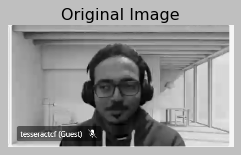

In [ ]:
# Original image
plt.subplot(1, 2, 1)
plt.imshow(imgmat, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

## PCA Practical Exercise
- In this example we will use a real data and apply PCA as a dimensionality reduction method.
- <b>Note that,</b> in the following exercise we will use the numpy linear algebra package and numpy arrays to perform our task. However, in the future you will use <b>sklearn ML library and pandas data frame</b> which are more practically used in the work environment.

### Use the following code to load your data and print out its description

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.keys())

print(cancer['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 f

### Use the following code to save the input features into numpy array

In [2]:
Data = cancer['data']

### Check out the shape of the data matrix

In [3]:
Data.shape

(569, 30)

### Display a scatter plot between the first feature (first column. i.e. index 0) and the second feature (second column. i.e. index 1)  

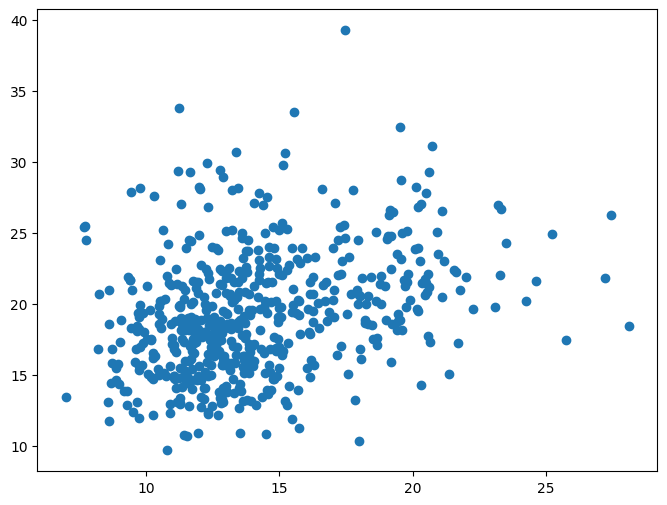

In [5]:
import matplotlib.pyplot as plt
 
x1 = cancer.data[:, 0]  
x2 = cancer.data[:, 1]  


plt.figure(figsize=(8, 6))
plt.scatter(x1, x2 )
plt.show()


### Display a scatter plot between the first feature (first column. i.e. index 0) and the 23rd feature (23rd column. i.e. index 22)  

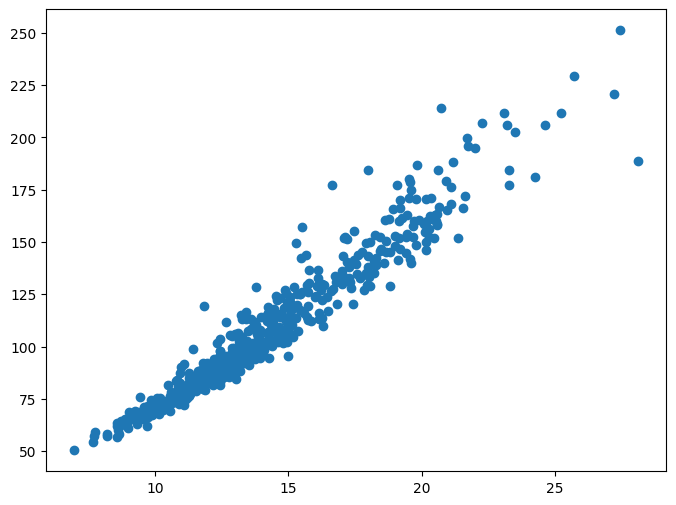

In [6]:

x1 = Data[:, 0]  
x23 = Data[:, 22]  
plt.figure(figsize=(8, 6))
plt.scatter(x1, x23)
plt.show()

### Display a scatter plot between any other two features (columns of your chice)

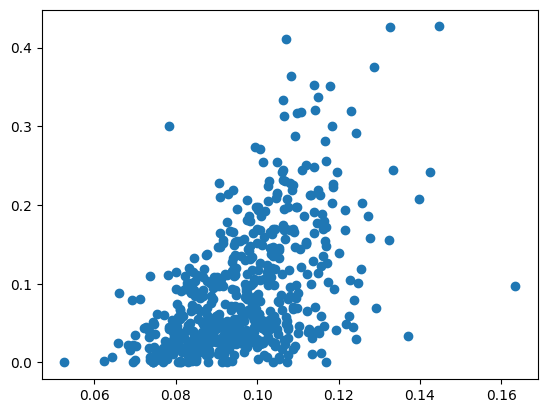

In [7]:

x_feature = Data[:, 4]  
y_feature = Data[:, 6] 
plt.scatter(x_feature, y_feature)
plt.show()

### Standrdize the data (Subtract mean and divide by standard deviation ddof = 0)

In [8]:

cancer = load_breast_cancer()
Data = cancer['data']


mean = np.mean(Data, axis=0)
std = np.std(Data, axis=0, ddof=0)


standardized_data = (Data - mean) / std


print("Mean:\n", mean)
print("\nStandard Deviation:\n", std)
print("\nStandardized Data:\n", standardized_data)


NameError: name 'np' is not defined

### Find the covariance matrix of the standardized data and print its shape ddof = 0

In [90]:

cov_matrix = np.cov(standardized_data, rowvar=False, ddof=0)
print("Covariance Matrix:\n", cov_matrix)
print("\nShape of Covariance Matrix:", cov_matrix.shape)


Covariance Matrix:
 [[ 1.00000000e+00  3.23781891e-01  9.97855281e-01  9.87357170e-01
   1.70581187e-01  5.06123578e-01  6.76763550e-01  8.22528522e-01
   1.47741242e-01 -3.11630826e-01  6.79090388e-01 -9.73174431e-02
   6.74171616e-01  7.35863663e-01 -2.22600125e-01  2.05999980e-01
   1.94203623e-01  3.76168956e-01 -1.04320881e-01 -4.26412691e-02
   9.69538973e-01  2.97007644e-01  9.65136514e-01  9.41082460e-01
   1.19616140e-01  4.13462823e-01  5.26911462e-01  7.44214198e-01
   1.63953335e-01  7.06588569e-03]
 [ 3.23781891e-01  1.00000000e+00  3.29533059e-01  3.21085696e-01
  -2.33885160e-02  2.36702222e-01  3.02417828e-01  2.93464051e-01
   7.14009805e-02 -7.64371834e-02  2.75868676e-01  3.86357623e-01
   2.81673115e-01  2.59844987e-01  6.61377735e-03  1.91974611e-01
   1.43293077e-01  1.63851025e-01  9.12716776e-03  5.44575196e-02
   3.52572947e-01  9.12044589e-01  3.58039575e-01  3.43545947e-01
   7.75033588e-02  2.77829592e-01  3.01025224e-01  2.95315843e-01
   1.05007910e-01  1.

### Find eigen values and eigen vectors of the covariance matrix and print eigen values.

In [92]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [63]:
print("Eigenvalues:\n", eigen_values)

array([13.28160768,  5.69135461,  2.81794898,  1.98064047,  1.64873055,
        1.20735661,  0.67522011,  0.47661714,  0.41689481,  0.35069346,
        0.2939157 ,  0.26116137,  0.2413575 ,  0.15700972,  0.09413497,
        0.0798628 ,  0.05939904,  0.05261878,  0.04947759,  0.00013304,
        0.0007488 ,  0.00158934,  0.00690046,  0.00817764,  0.01548127,
        0.01805501,  0.02434084,  0.0274394 ,  0.0311594 ,  0.02997289])

### How much explained variance if we used 2,3,4,5,6 principal components?
### Can you guess the major principal components?

In [94]:
total_variance = np.sum(eigen_values)
sorted_eigen_values = np.sort(eigen_values)[::-1]
explained_variance_2 = np.sum(sorted_eigen_values[:2]) / total_variance * 100
explained_variance_3 = np.sum(sorted_eigen_values[:3]) / total_variance * 100
explained_variance_4 = np.sum(sorted_eigen_values[:4]) / total_variance * 100
explained_variance_5 = np.sum(sorted_eigen_values[:5]) / total_variance * 100
explained_variance_6 = np.sum(sorted_eigen_values[:6]) / total_variance * 100

print("Explained variance % (2 PCs):", explained_variance_2)



Explained variance % (2 PCs): 63.243207651559445


In [95]:
print("Explained variance % (3 PCs):", explained_variance_3)


Explained variance % (3 PCs): 72.63637090899081


In [96]:
print("Explained variance % (4 PCs):", explained_variance_4)


Explained variance % (4 PCs): 79.23850582446096


In [97]:
print("Explained variance % (5 PCs):", explained_variance_5)


Explained variance % (5 PCs): 84.73427431680722


In [98]:
print("Explained variance % (6 PCs):", explained_variance_6)

Explained variance % (6 PCs): 88.75879635669057


### Use the first two PCs and transform you data (using projection)

In [99]:
eigen_vectors_2pc = eigen_vectors[:, :2]  
transformed_data_2pc = np.dot(standardized_data, eigen_vectors_2pc)
print("Transformed data (first 2 PCs):")
print(transformed_data_2pc[:5])  
print("Shape of transformed data:", transformed_data_2pc.shape)


Transformed data (first 2 PCs):
[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 [ 7.1229532  10.27558912]
 [ 3.93530207 -1.94807157]]
Shape of transformed data: (569, 2)


### Show a scatter plot of the transformed data (Notice the graph)

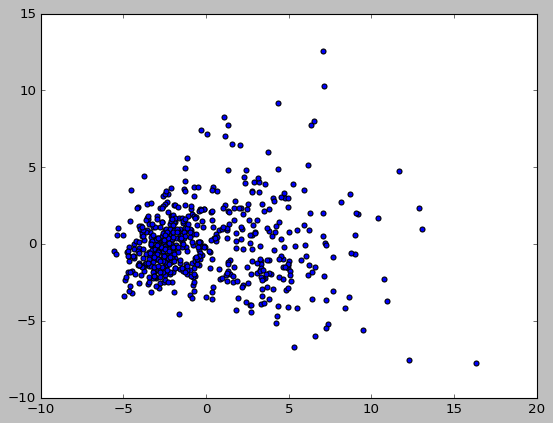

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data_2pc[:, 0], transformed_data_2pc[:, 1])
plt.show()


### Find the correlation and covariance matrices for the transformed data. (Notice the results)

In [14]:

Data_norm=(Data-Data.mean(axis=0))/(Data.std(axis=0))
cov_mat=np.cov(Data_norm,rowvar=False,ddof=0,bias=True)
val,vec=np.linalg.eig(cov_mat)
indxes=np.argsort(-val)
vec=vec[:,indxes]
vec=vec[:,:2]
print(vec)
Mat2=Data_norm@vec
print(Mat2)


[[ 0.21890244 -0.23385713]
 [ 0.10372458 -0.05970609]
 [ 0.22753729 -0.21518136]
 [ 0.22099499 -0.23107671]
 [ 0.14258969  0.18611302]
 [ 0.23928535  0.15189161]
 [ 0.25840048  0.06016536]
 [ 0.26085376 -0.0347675 ]
 [ 0.13816696  0.19034877]
 [ 0.06436335  0.36657547]
 [ 0.20597878 -0.10555215]
 [ 0.01742803  0.08997968]
 [ 0.21132592 -0.08945723]
 [ 0.20286964 -0.15229263]
 [ 0.01453145  0.20443045]
 [ 0.17039345  0.2327159 ]
 [ 0.15358979  0.19720728]
 [ 0.1834174   0.13032156]
 [ 0.04249842  0.183848  ]
 [ 0.10256832  0.28009203]
 [ 0.22799663 -0.21986638]
 [ 0.10446933 -0.0454673 ]
 [ 0.23663968 -0.19987843]
 [ 0.22487053 -0.21935186]
 [ 0.12795256  0.17230435]
 [ 0.21009588  0.14359317]
 [ 0.22876753  0.09796411]
 [ 0.25088597 -0.00825724]
 [ 0.12290456  0.14188335]
 [ 0.13178394  0.27533947]]
[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


In [15]:

mat2_norm=(Mat2-Mat2.mean(axis=0))/(Mat2.std(axis=0))
covv=np.round(np.cov(Mat2, rowvar=False, bias=True),5)
corr=np.round(np.cov(mat2_norm, rowvar=False, bias=True),5)
print('covariance mat ')
print(covv)
print('corr mat ')
print(corr)

covariance mat 
[[13.28161  0.     ]
 [ 0.       5.69135]]
corr mat 
[[1. 0.]
 [0. 1.]]


## Congratulations 
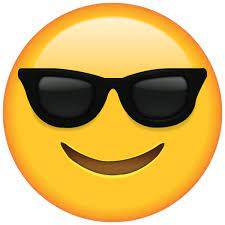